In [1]:
%pylab inline
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

/Users/brodzik/.conda/envs/cetbtools/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [48]:
%cd ~/projects/PMESDR/CSU_FCDR/F08/8711/871101
%ls

/Users/brodzik/projects/PMESDR/CSU_FCDR/F08/8711/871101
CSU_SSMI_FCDR_V01R00_F08_D19871101_S0134_E0316_R01892.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S0316_E0458_R01893.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S0458_E0640_R01894.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S0640_E0822_R01895.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S0822_E1004_R01896.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S1004_E1146_R01897.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S1146_E1328_R01898.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S1328_E1510_R01899.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S1510_E1652_R01900.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S1652_E1834_R01901.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S1834_E2016_R01902.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S2016_E2158_R01903.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S2158_E2340_R01904.nc
CSU_SSMI_FCDR_V01R00_F08_D19871101_S2340_E0122_R01905.nc


In [49]:
list = sort(glob.glob("*nc"))
list

array(['CSU_SSMI_FCDR_V01R00_F08_D19871101_S0134_E0316_R01892.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S0316_E0458_R01893.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S0458_E0640_R01894.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S0640_E0822_R01895.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S0822_E1004_R01896.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S1004_E1146_R01897.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S1146_E1328_R01898.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S1328_E1510_R01899.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S1510_E1652_R01900.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S1652_E1834_R01901.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S1834_E2016_R01902.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S2016_E2158_R01903.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S2158_E2340_R01904.nc',
       'CSU_SSMI_FCDR_V01R00_F08_D19871101_S2340_E0122_R01905.nc'], 
      dtype='|S56')

In [4]:
f = Dataset(list[0], "r", format="NETCDF")
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0, NOAA CDR v1.0, GDS v2.0
    standard_name_vocabulary: CF Standard Name Table (v20, 11 September 2012)
    id: CSU_SSMI_FCDR_V01R00_F08_D19871101_S1652_E1834_R01901.nc
    naming_authority: gov.noaa.ncdc
    metadata_link: gov.noaa.ncdc:C00827
    title: CSU SSM/I FCDR
    product_version: V01R00
    revision_date: 2013-02-01
    summary: Colorado State University Special Sensor Microwave/Imager (SSM/I) Fundamental Climate Data Record (FCDR) of intercalibrated brightness temperatures
    keywords: EARTH SCIENCE > SPECTRAL/ENGINEERING > MICROWAVE > BRIGHTNESS TEMPERATURE
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 6.0
    platform: DMSP 5D-2/F08 > Defense Meteorological Satellite Program-F08
    sensor: SSM/I > Special Sensor Microwave/Imager
    cdm_data_type:

In [6]:
f.variables['fcdr_tb37h']

<type 'netCDF4._netCDF4.Variable'>
float32 fcdr_tb37h(nscan_lores, npixel_lores)
    units: kelvin
    _FillValue: -9999.9
    valid_range: [  50.  350.]
    standard_name: brightness_temperature
    long_name: NOAA FCDR of 37.0 GHz horizontally-polarized brightness temperature
    coordinates: lon_lores lat_lores
    grid_mapping: crs
    comment: Calibration Offset applied to 37h channel =  1.64 K (Adjusted to F13)
unlimited dimensions: 
current shape = (1609, 64)
filling on

In [7]:
data = f.variables['fcdr_tb37h'][:]
np.shape(data)
f.close()

In [9]:
np.amin(data), np.amax(data), np.shape(data)

(129.72, 286.48999, (1609, 64))

In [10]:
28 * 300

8400

In [11]:
blank = np.zeros(np.shape(data))
np.shape(blank)

(1609, 64)

In [50]:
def add_new_swath(image, image_index, list, list_index):
    f = Dataset(list[list_index], "r", format="NETCDF")
    data = f.variables['fcdr_tb37h'][:]
    print("file:", list[list_index])
    print("shape:", np.shape(data))
    image[0:data.shape[0], image_index * 64: (image_index * 64) + data.shape[1]] = data
    print("data:", np.amin(data), np.amax(data))
    print("image:",np.amin(image), np.amax(image))
    f.close()
    return(image)

In [51]:
my_image = np.zeros((1615,64 * 14))
my_image.fill(250.)
for i in np.arange(14):
    my_image = add_new_swath(my_image, 14 - 1 - i, list, i)

('file:', 'CSU_SSMI_FCDR_V01R00_F08_D19871101_S0134_E0316_R01892.nc')
('shape:', (1274, 64))
('data:', 127.05, 285.13)
('image:', -9999.900390625, 285.1300048828125)
('file:', 'CSU_SSMI_FCDR_V01R00_F08_D19871101_S0316_E0458_R01893.nc')
('shape:', (1567, 64))
('data:', 127.84, 285.92001)
('image:', -9999.900390625, 285.92001342773438)
('file:', 'CSU_SSMI_FCDR_V01R00_F08_D19871101_S0458_E0640_R01894.nc')
('shape:', (1605, 64))
('data:', 129.14999, 282.81)
('image:', -9999.900390625, 285.92001342773438)
('file:', 'CSU_SSMI_FCDR_V01R00_F08_D19871101_S0640_E0822_R01895.nc')
('shape:', (1609, 64))
('data:', 73.419998, 294.60001)
('image:', -9999.900390625, 294.60000610351562)
('file:', 'CSU_SSMI_FCDR_V01R00_F08_D19871101_S0822_E1004_R01896.nc')
('shape:', (1605, 64))
('data:', 126.14, 290.97)
('image:', -9999.900390625, 294.60000610351562)
('file:', 'CSU_SSMI_FCDR_V01R00_F08_D19871101_S1004_E1146_R01897.nc')
('shape:', (1605, 64))
('data:', 124.89, 287.29001)
('image:', -9999.900390625, 294.

In [16]:
my_image.shape

(1609, 896)

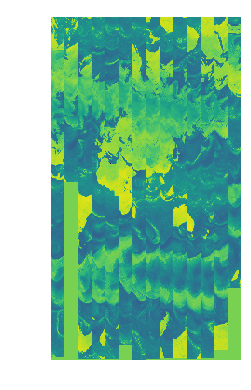

In [59]:
fig, ax = plt.subplots(1, 1)
plt.imshow(my_image, cmap='viridis', interpolation='None',
          vmin=50., vmax=300.)
plt.axis('off')
plt.tight_layout()

In [60]:
outfile = "/Users/brodzik/2017/SciPy/CSU_swaths_19871101.png"
fig.savefig(outfile,dpi=300)

In [34]:
from cetbtools.inspector import make_cetb_png

/Users/brodzik/.conda/envs/cetbtools/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [54]:
%cd /Users/brodzik/2017/SciPy/
%ls *.nc

/Users/brodzik/2017/SciPy
NSIDC-0630-EASE2_N3.125km-F08_SSMI-1987305-37H-M-SIR-CSU-v1.2.nc


In [55]:
filename = 'NSIDC-0630-EASE2_N3.125km-F08_SSMI-1987305-37H-M-SIR-CSU-v1.2.nc'

In [56]:
f = Dataset(filename, "r", format="NETCDF")
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6, ACDD-1.3
    title: MEaSUREs Calibrated Passive Microwave Daily EASE-Grid 2.0 Brightness Temperature ESDR
    product_version: v1.2
    software_version_id: 0.2.33
    software_repository: git@bitbucket.org:nsidc/measures-byu.git
    history: meas_meta_sir
    comment: Epoch date for data in this file: 1987-11-01 00:00:00Z
    source: CSU SSM/I FCDR V01R00
    references: Long, D. G. and M. J. Brodzik. 2016. Optimum Image Formation for Spaceborne Microwave Radiometer Products. IEEE Trans. Geosci. Remote Sensing, 54(5):2763-2779, doi:10.1109/TGRS.2015.2505677.
Algorithm Theoretical Basis Document:  https://nsidc.org/sites/nsidc.org/files/technical-references/MEaSUREs_CETB_ATBD.pdf

    metadata_link: http://nsidc.org/data/nsidc-0630.html
    summary: An improved, enhanced-resolution, gridded passive microwave Earth System Data Record for monitoring cryospheric and hydrologic tim

In [40]:
data = f.variables['TB'][:]
data = np.squeeze(data)
data.shape

(5760, 5760)

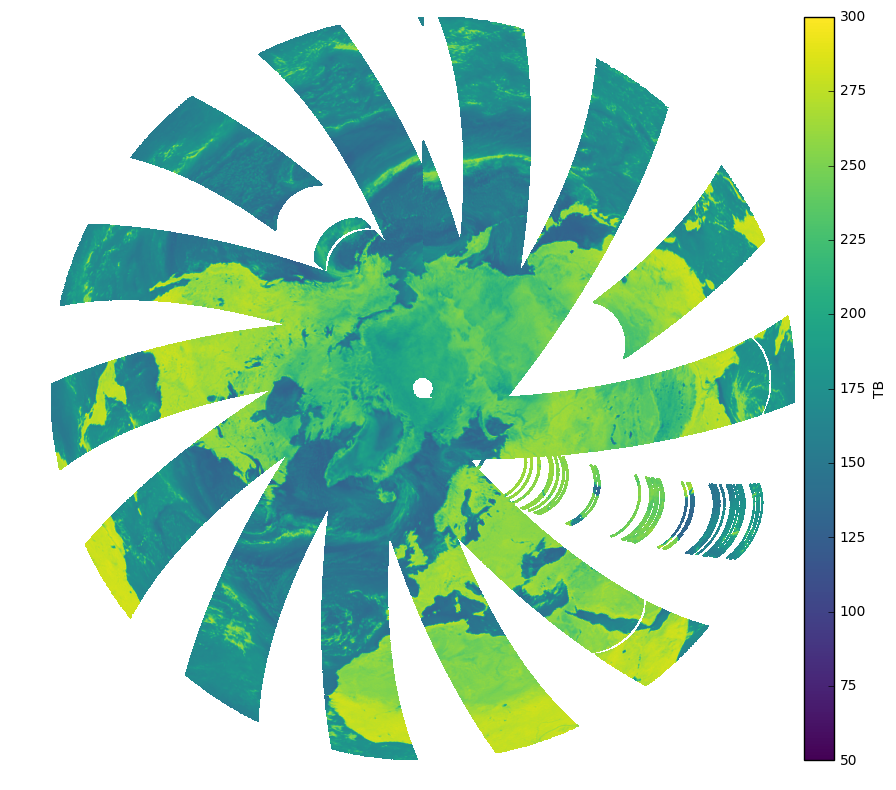

In [57]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.axis('off')
dataAx = ax.imshow(data, cmap='viridis', vmin=50., vmax=300, interpolation='nearest',
                   aspect='equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.1)
dataCbar = plt.colorbar(dataAx, cax=cax, label='TB')
ax.axis('off')
plt.tight_layout()
plt.show()

In [58]:
outfile = "/Users/brodzik/2017/SciPy/N_sir_37H_M_19871101.png"
fig.savefig(outfile,dpi=300)